<a href="https://colab.research.google.com/github/Amjadkp/DIGITAL-IMAGE-PROCESSING/blob/main/DIGITAL_set2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perform Four Arithmetic Operations Between Two Images**

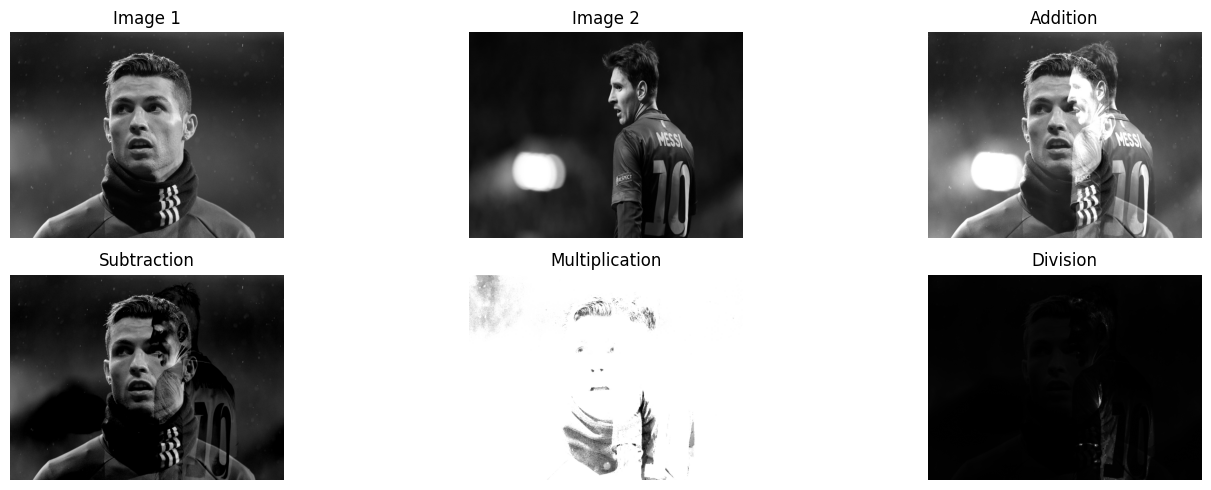

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read two images of same size (grayscale for simplicity)
img1 = cv2.imread('/content/100334-2048x1536-desktop-hd-cristiano-ronaldo-wallpaper-photo.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded successfully
if img1 is None:
    print("Error: Could not load image1.png. Please make sure the image file exists and the path is correct.")
elif img2 is None:
    print("Error: Could not load image2.png. Please make sure the image file exists and the path is correct.")
else:
    # Resize if needed
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Arithmetic operations
    added = cv2.add(img1, img2)
    subtracted = cv2.subtract(img1, img2)
    multiplied = cv2.multiply(img1, img2)
    divided = cv2.divide(img1, img2)

    # Show results
    images = [img1, img2, added, subtracted, multiplied, divided]
    titles = ['Image 1', 'Image 2', 'Addition', 'Subtraction', 'Multiplication', 'Division']

    plt.figure(figsize=(15,5))
    for i in range(6):
        plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**Reduce Noise by Averaging the Image by 2, 8, 16, 32, 128**

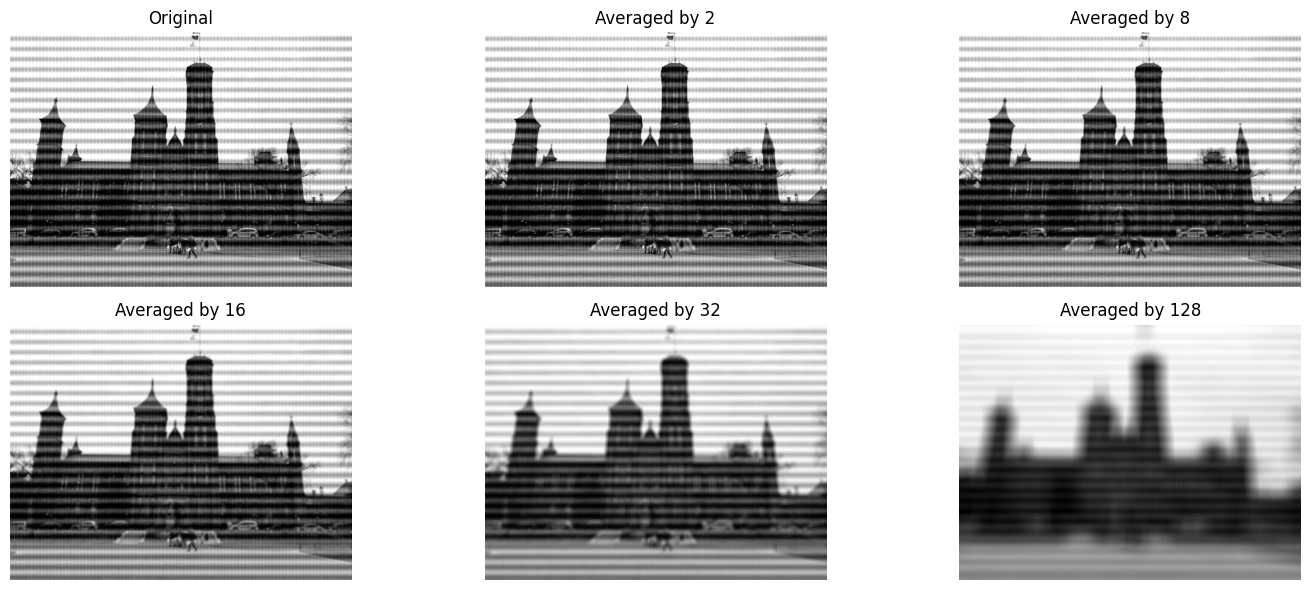

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/Noisy_Smithsonian_Castle.jpg', cv2.IMREAD_GRAYSCALE)
avgs = [2, 8, 16, 32, 128]
images = [img]

for avg in avgs:
    blurred = cv2.blur(img, (avg, avg))
    images.append(blurred)

titles = ['Original'] + [f'Averaged by {k}' for k in avgs]

plt.figure(figsize=(15,6))
for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


**Implement All Types of Linear Spatial Filters (with Functions)**

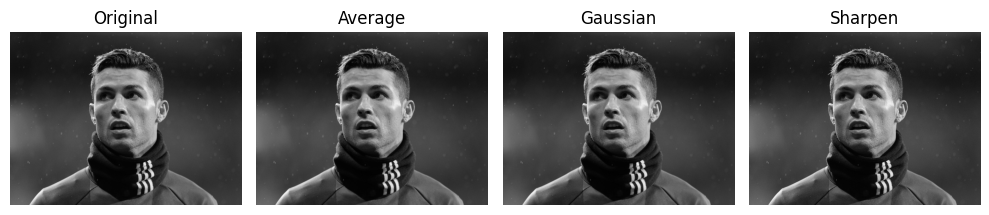

In [ ]:
def apply_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

img = cv2.imread('/content/100334-2048x1536-desktop-hd-cristiano-ronaldo-wallpaper-photo.jpg', cv2.IMREAD_GRAYSCALE)

# Example kernels
average_kernel = np.ones((3,3), np.float32) / 9
gaussian_kernel = cv2.getGaussianKernel(3, 1)
gaussian_kernel = gaussian_kernel @ gaussian_kernel.T
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])

# Apply filters
average = apply_filter(img, average_kernel)
gaussian = apply_filter(img, gaussian_kernel)
sharpen = apply_filter(img, sharpen_kernel)

titles = ['Original', 'Average', 'Gaussian', 'Sharpen']
images = [img, average, gaussian, sharpen]

plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


**Image Convolution & Correlation with Custom Mask (ASCII File Reading)**

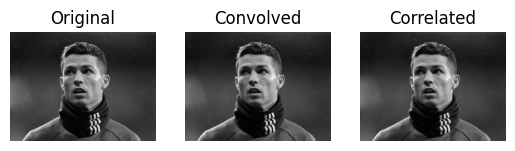

In [ ]:
import numpy as np
import cv2

# Read kernel from ASCII file
def read_kernel_from_txt(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    kernel = np.array([[float(num) for num in line.split()] for line in lines])
    kernel /= kernel.sum() # Normalize for averaging
    return kernel

img = cv2.imread('/content/100334-2048x1536-desktop-hd-cristiano-ronaldo-wallpaper-photo.jpg', cv2.IMREAD_GRAYSCALE)
kernel = read_kernel_from_txt('mask.txt')

# Convolution
convolved = cv2.filter2D(img, -1, kernel)

# Correlation is same as convolution (unless the kernel is asymmetric & needs flipping)
correlated = cv2.filter2D(img, -1, kernel)

# Show results
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(convolved, cmap='gray')
plt.title('Convolved')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(correlated, cmap='gray')
plt.title('Correlated')
plt.axis('off')
plt.show()


**Median Filtering (with Salt-and-Pepper Noise)**

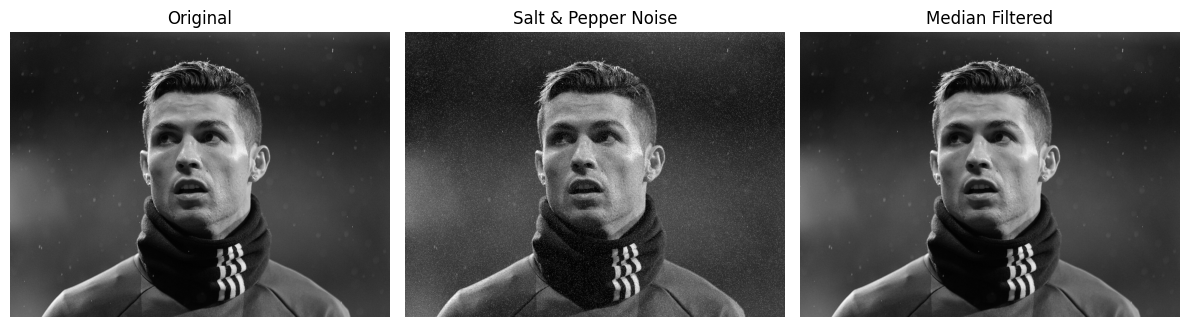

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add salt and pepper noise
def add_salt_pepper_noise(img, salt_prob, pepper_prob):
    noisy = np.copy(img)
    total_pixels = img.size
    # Salt
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    noisy[tuple(coords)] = 255

    # Pepper
    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    noisy[tuple(coords)] = 0
    return noisy

# Read the image
img = cv2.imread('/content/100334-2048x1536-desktop-hd-cristiano-ronaldo-wallpaper-photo.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt and pepper noise
noisy_img = add_salt_pepper_noise(img, 0.03, 0.03)

# Apply median filtering
median_filtered = cv2.medianBlur(noisy_img, 3)  # kernel size 3

# Show images
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(noisy_img, cmap='gray'); plt.title("Salt & Pepper Noise"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(median_filtered, cmap='gray'); plt.title("Median Filtered"); plt.axis('off')
plt.tight_layout()
plt.show()


 **Edge Detection Using Various Methods**

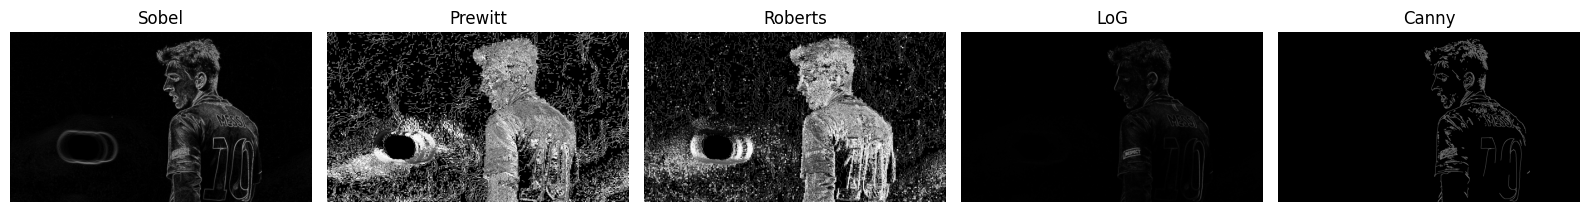

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

img = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Prewitt
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittx = ndimage.convolve(img, kernelx)
prewitty = ndimage.convolve(img, kernely)
prewitt = np.hypot(prewittx, prewitty)

# Roberts
robertsx = np.array([[1, 0], [0, -1]])
robertsy = np.array([[0, 1], [-1, 0]])
robertsx = ndimage.convolve(img, robertsx)
robertsy = ndimage.convolve(img, robertsy)
roberts = np.hypot(robertsx, robertsy)

# Laplacian of Gaussian (LoG)
log = cv2.GaussianBlur(img, (3,3), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

# Canny
canny = cv2.Canny(img, 100, 200)

# Show comparisons
titles = ['Sobel', 'Prewitt', 'Roberts', 'LoG', 'Canny']
methods = [sobel, prewitt, roberts, log, canny]

plt.figure(figsize=(16,4))
for idx, (title, method) in enumerate(zip(titles, methods)):
    plt.subplot(1,5,idx+1)
    plt.imshow(np.uint8(np.absolute(method)), cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


**Smoothing an RGB Image with a Linear Spatial Filter**

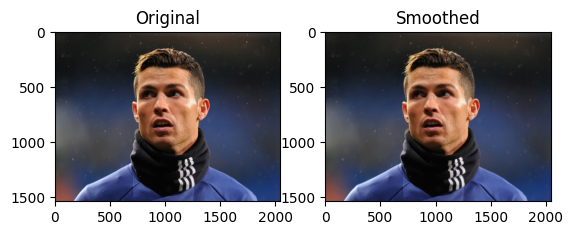

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
img = cv2.imread('/content/100334-2048x1536-desktop-hd-cristiano-ronaldo-wallpaper-photo.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply linear (mean) filter
smooth = cv2.blur(img_rgb, (5, 5))

plt.subplot(121), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(122), plt.imshow(smooth), plt.title('Smoothed')
plt.show()


**Sharpening an RGB Image Using Laplacian Filter**

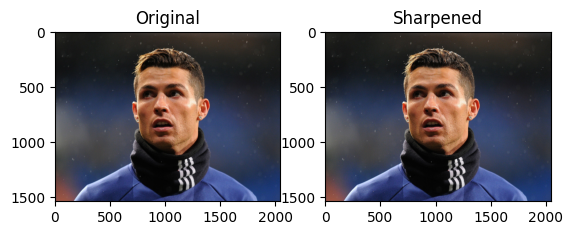

In [4]:
# Apply Laplacian filter for sharpening
laplacian = cv2.Laplacian(img_rgb, cv2.CV_64F)
sharpened = cv2.convertScaleAbs(img_rgb - 0.7 * laplacian)

plt.subplot(121), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(122), plt.imshow(sharpened), plt.title('Sharpened')
plt.show()


***DFT Filtering With and Without Padding***

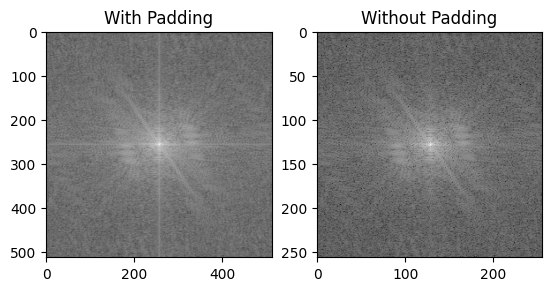

In [5]:
# Load grayscale, crop/resize to 256x256 if needed
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_256 = cv2.resize(gray, (256, 256))

# (a) With Padding
dft_pad = cv2.copyMakeBorder(gray_256,0,256,0,256,cv2.BORDER_CONSTANT,value=0)
dft = cv2.dft(np.float32(dft_pad),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# (b) Without Padding
dft2 = cv2.dft(np.float32(gray_256),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

plt.subplot(121), plt.imshow(np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])),cmap='gray'), plt.title('With Padding')
plt.subplot(122), plt.imshow(np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1])),cmap='gray'), plt.title('Without Padding')
plt.show()


**Low-Pass/Smoothing Frequency Domain Filters**

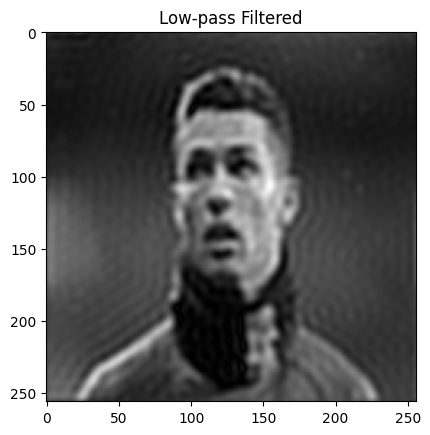

In [6]:
import scipy.fftpack as fp

def low_pass_filter(img, radius=30):
    f = fp.fft2(img)
    fshift = fp.fftshift(f)
    rows, cols = img.shape
    crow, ccol = rows//2 , cols//2
    mask = np.zeros_like(img)
    cv2.circle(mask, (ccol, crow), radius, 1, -1)
    fshift = fshift * mask
    f_ishift = fp.ifftshift(fshift)
    img_back = fp.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

lowpass = low_pass_filter(gray_256)
plt.imshow(lowpass, cmap='gray')
plt.title('Low-pass Filtered')
plt.show()


**High-Pass/Sharpening Frequency Domain Filters**

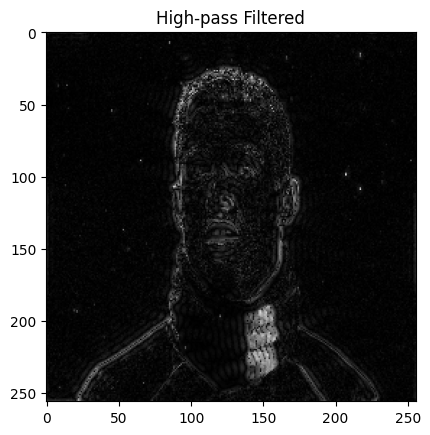

In [7]:
def high_pass_filter(img, radius=30):
    f = fp.fft2(img)
    fshift = fp.fftshift(f)
    rows, cols = img.shape
    crow, ccol = rows//2 , cols//2
    mask = np.ones_like(img)
    cv2.circle(mask, (ccol, crow), radius, 0, -1)
    fshift = fshift * mask
    f_ishift = fp.ifftshift(fshift)
    img_back = fp.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

highpass = high_pass_filter(gray_256)
plt.imshow(highpass, cmap='gray')
plt.title('High-pass Filtered')
plt.show()


**Detecting Straight Lines Using Filter Masks**

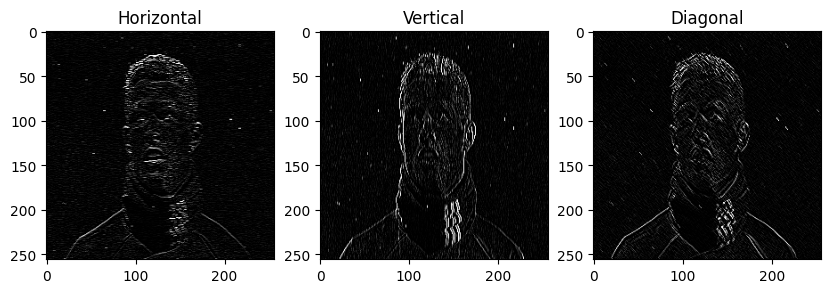

In [8]:
# Define horizontal, vertical, diagonal filter masks
horizontal = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
vertical = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
diagonal = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

# Apply filters
hor_edges = cv2.filter2D(gray_256, -1, horizontal)
ver_edges = cv2.filter2D(gray_256, -1, vertical)
diag_edges = cv2.filter2D(gray_256, -1, diagonal)

plt.figure(figsize=(10,3))
plt.subplot(131), plt.imshow(hor_edges,cmap='gray'), plt.title('Horizontal')
plt.subplot(132), plt.imshow(ver_edges,cmap='gray'), plt.title('Vertical')
plt.subplot(133), plt.imshow(diag_edges,cmap='gray'), plt.title('Diagonal')
plt.show()
